In [392]:
from IPython import display
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
import ast
import glob
import os
import sacredfig
import numpy as np
plt.style.use(sacredfig.style)

### Loading in filtered and structured dataframes from experiment
(See creating_data_structures.ipynb for info on how structure was created from empirica export)

In [393]:
combined_path = '/Users/franziskahafner/Desktop/oii/trinity/thesis/experiment_data/prolific_data/combined_experiment_data/'
character_df = pd.read_csv(combined_path + "character_df.csv")
player_df = pd.read_csv(combined_path + "player_df.csv")
characterChoiceSurvey_df = pd.read_csv(combined_path + "characterChoiceSurvey_df.csv")
SwipeDecision_df = pd.read_csv(combined_path + "SwipeDecision_df.csv")
endRecSystemSurvey_df = pd.read_csv(combined_path + "endRecSystemSurvey_df.csv")
endDatingAppSurvey_df = pd.read_csv(combined_path + "endDatingAppSurvey_df.csv")
SwipeProfileRecSystemSurvey_df = pd.read_csv(combined_path + "SwipeProfileRecSystemSurvey_df.csv")
SwipeProfileProfileChoiceSurvey_df = pd.read_csv(combined_path + "SwipeProfileProfileChoiceSurvey_df.csv")
SwipeProfileRecSystemSurvey_df = SwipeProfileRecSystemSurvey_df.merge(SwipeDecision_df[['id', 'roundsPlayed']], on = 'id', how = 'left')

In [394]:
player_df['Country of residence'].value_counts()

United States     50
United Kingdom    50
Name: Country of residence, dtype: int64

In [395]:
player_df['Gender'].value_counts()

Man (including Trans Male/Trans Man)           40
Woman (including Trans Female/Trans Woman)     40
Non-binary (would like to give more detail)    20
Name: Gender, dtype: int64

In [435]:
len(player_df['chosenProfile'].value_counts())

70

### ER-Diagram with all Data Frame names, columns, and relationships

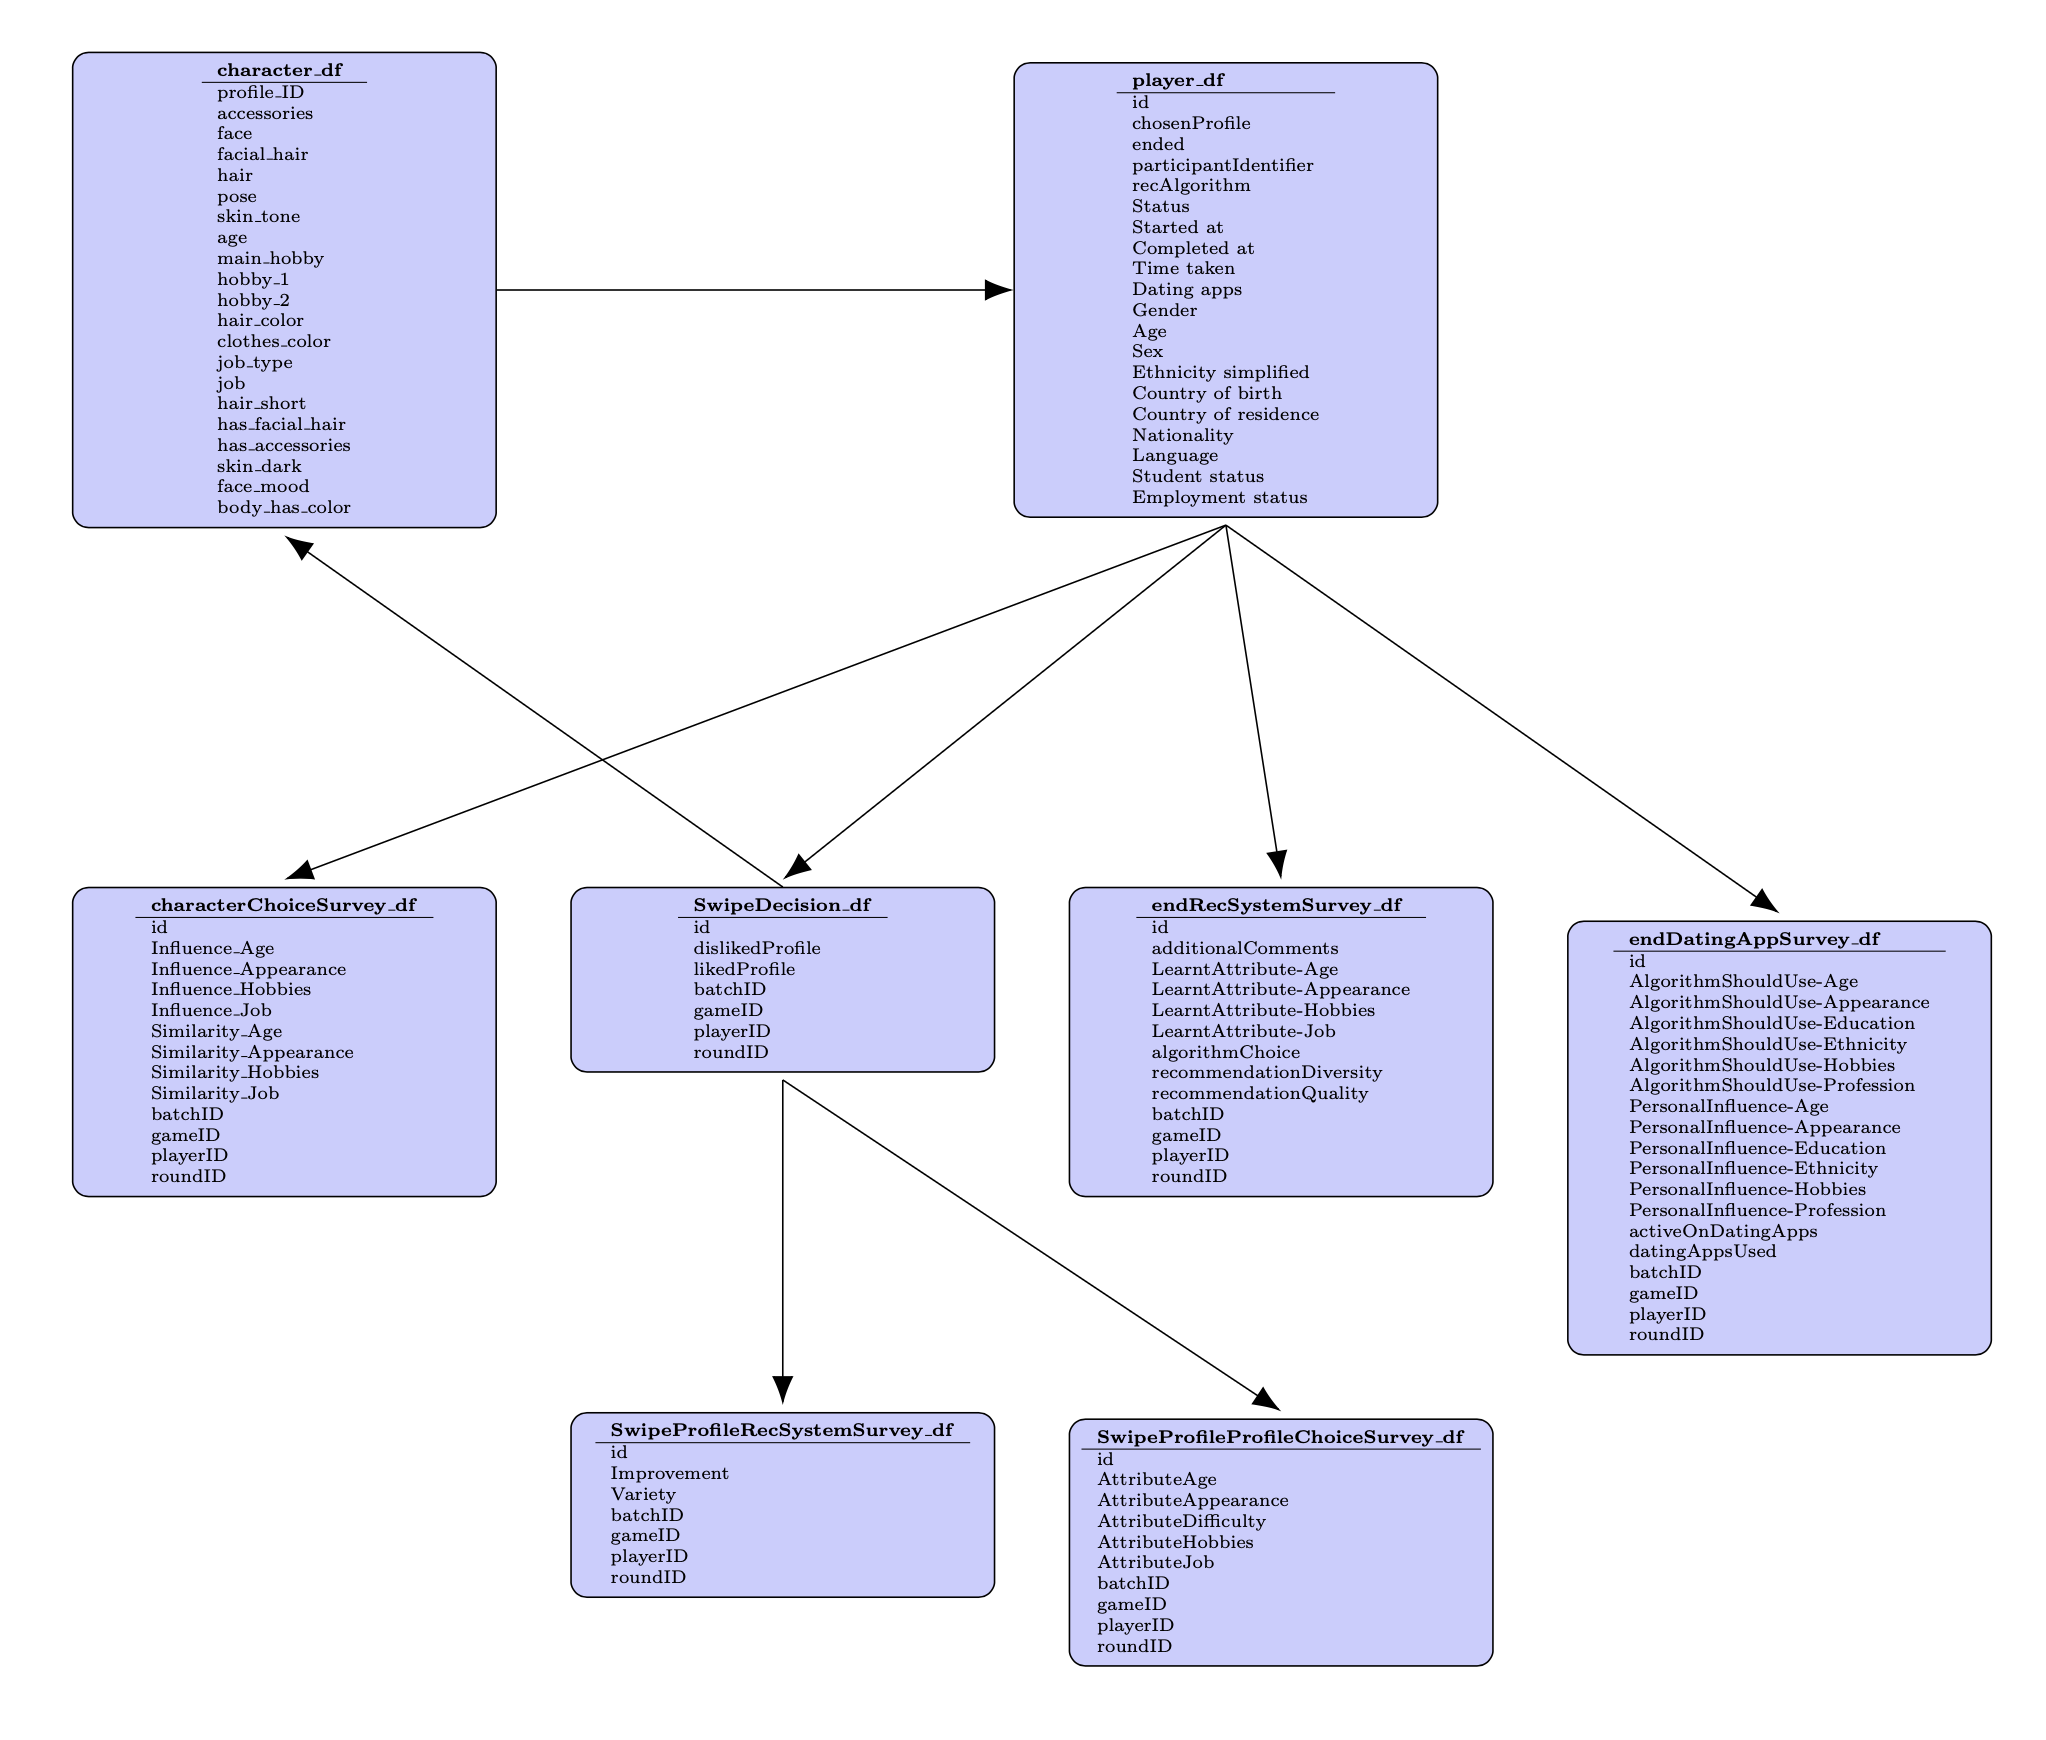

In [398]:
display.Image("ER_Diagram.png")

In [399]:
SwipeDecision_df[SwipeDecision_df['strongPreferenceDetected']==True]

,id,roundsPlayed,dislikedProfile,likedProfile,strongPreferenceDetected,strongPreferences,batchID,gameID,playerID,roundID
0,01J1TR1HBWA0YCE280W5QA1AQ3,16.0,100.0,248.0,True,"[""longHair""]",01J1TPRQR0AQARK30XQ4RJQ9N2,01J1TPRQT9BCPBZG5ERGXTEXZV,01J1TQTERTVXPBN1RB1E4KVWQV,01J1TQTNV52EW3B4TYHC3WYEWJ
1,01J1TR7AY5SYQ27XHTWJJW301H,34.0,222.0,236.0,True,"[""noBeard""]",01J1TPRQR0AQARK30XQ4RJQ9N2,01J1TPRQTDR101X78RW058CF7R,01J1TQNANBFZV7M6VRM670890H,01J1TQNP821H2EBMD82PJEAKSC
3,01J1TR898ZC78RADMRK2XW52DZ,36.0,160.0,244.0,True,"[""noBeard""]",01J1TPRQR0AQARK30XQ4RJQ9N2,01J1TPRQTDR101X78RW058CF7R,01J1TQNANBFZV7M6VRM670890H,01J1TQNP821H2EBMD82PJEAKSC
4,01J1TSRNZNS22RVTRHRSC6CPD8,23.0,106.0,244.0,True,"[""longHair""]",01J1TPRQR0AQARK30XQ4RJQ9N2,01J1TPRQT4AFY9Y2QS6V17HQ2C,01J1TSBC1JBYGJ3PRK05CRMF3K,01J1TSGN9YTNGTEYV5SKHKV94H
5,01J1TSXMY48JKXGV0S0XXSQWYK,45.0,110.0,121.0,True,"[""longHair""]",01J1TPRQR0AQARK30XQ4RJQ9N2,01J1TPRQT4AFY9Y2QS6V17HQ2C,01J1TSBC1JBYGJ3PRK05CRMF3K,01J1TSGN9YTNGTEYV5SKHKV94H
...,...,...,...,...,...,...,...,...,...,...
5035,01J1R5Q7QHK70KFFW29VN9T4PF,27.0,255.0,110.0,True,"[""longHair""]",01J1R2GFZA9PWFJ7ZYRQXM0AHA,01J1R2GG3ABBQ1KGPR23VNQP0T,01J1R5CZ1YZT9P0XTG2GEHM8CN,01J1R5D5X0HM8KHPX5VA2H65HW
5036,01J1R9BQ5CFTM5MBPARBH10Z8R,37.0,248.0,53.0,True,"[""longHair""]",01J1R2GFZA9PWFJ7ZYRQXM0AHA,01J1R2GG3DJ3KD5ZRKCRRB2WG4,01J1R939DN6B6C0PCDR34A2GRW,01J1R93GKFFRW3QK425KEKJEFD
5041,01J1R7CSGJ15J6ZPCR9A1XDJ85,35.0,82.0,2.0,True,"[""beard""]",01J1R2GFZA9PWFJ7ZYRQXM0AHA,01J1R2GG1XCW2RQDPTEFHP27JC,01J1R6VPC3EWGGJV8ZF94GJG68,01J1R6VTK21TGDRM72J4WAJ7BQ
5043,01J1R3FA8GCEA4X58W7SGV5B74,18.0,112.0,231.0,True,"[""longHair""]",01J1R2GFZA9PWFJ7ZYRQXM0AHA,01J1R2GG20CNG1PGZC283FBNM2,01J1R37J3PWJSS835J53AJ0KMS,01J1R37MJMBPVCFGR8BRQ5N1JT


### Making sure there were no recommendation errors:

In [436]:
def count_preferences(pref_string):
    if pd.isna(pref_string):
        return np.nan
    try:
        preferences = ast.literal_eval(pref_string)
        return len(preferences)
    except (ValueError, SyntaxError):
        return np.nan

SwipeDecision_df['number_of_strong_preferences'] = SwipeDecision_df['strongPreferences'].apply(count_preferences)

In [437]:
all_profiles = pd.concat([SwipeDecision_df[['playerID', 'likedProfile']].rename(columns={'likedProfile': 'profileID'}),
                          SwipeDecision_df[['playerID', 'dislikedProfile']].rename(columns={'dislikedProfile': 'profileID'})])
profile_counts = all_profiles.groupby(['playerID', 'profileID']).size().reset_index(name='count')
players_with_duplicates = profile_counts[profile_counts['count'] > 1]['playerID'].unique()
players_with_duplicates = list(players_with_duplicates)

In [438]:
profile_counts[profile_counts['count']>2]

,playerID,profileID,count


### Open Text Questions:

In [439]:
list(endRecSystemSurvey_df[endRecSystemSurvey_df['additionalComments'].notna()]['additionalComments'])

['No',
 'N/a',
 "I initially thought the diversity was good, but i'm not sure if this selection encouraged the algorithm to give me more varied profiles. It ended up too much near the end.",
 'no',
 'It was matching me with men and women.   I would have preferred a choice, and I never saw that option.',
 'no',
 'The recommendations seemed random, sometimes it felt like it is improving but then it would feel very random again.',
 'No',
 'Each time was inconsistent based on the hobbies',
 'It was a bit hit or miss, I purposefully selected profiles with similar hobbies to mine and sometimes it would suggest people with the same hobbies but sometimes it would be something completely random. Same with age and appearance ',
 'na',
 'it was a bit confusing as to the genders of the other candidates. It should learn what type of gender you perfer because in this experiment I assumed my character was Bi in order to consider both choices always. ',
 'dating is really hard, a lot sub-conscious thi

In [440]:
list(player_df[player_df['feedback'].notna()]['feedback'])

['No problems encountered.',
 'Fun experiment!',
 'I noticed it assumed I liked women when I selected long hair, and when I switched to short it threw in some men.',
 'Very interesting study, hope all goes well!',
 '6658badc8ce40f13d68d7d85',
 "I really can't isolate what I am looking for in a partner. It is difficult to put down specific things when you have a wife preference.",
 'none',
 'thank you for allowing me to participate, it was a very unique and well done study. I had fun',
 "Appearance mattered a lot to me, but not due to ethnicity. If they looked mean or unhappy, I didn't want to pick them even if their interests matched my character's, because dating mean people is just a bad idea. I always chose the happier, kinder, friendlier looking person if other factors seemed equally good. Good fits on keywords are only part of the equation.  ",
 'NO',
 'An interesting experiment, and no problems encountered.',
 'no problems',
 'Thank you for allowing me to take part ',
 'very inte

### What were the demographics of prolific participants?

In [441]:
continuous_columns = ['Time taken', 'Age']
player_df["Time taken"] = pd.to_numeric(player_df["Time taken"], errors='coerce')
player_df["Age"] = pd.to_numeric(player_df["Age"], errors='coerce')

categorical_columns = [
    'Gender', 'Sex', 'Ethnicity simplified', 'Country of birth', 
    'Country of residence', 'Nationality', 'Language', 'Student status', 
    'Employment status'
]
player_df['Time taken'] = player_df['Time taken'] / 60
continuous_summary = {}
categorical_summaries = {}
for column in continuous_columns:
    continuous_summary[column] = {
        'mean': player_df[column].mean(),
        'median': player_df[column].median(),
        'max': player_df[column].max(),
        'min': player_df[column].min(),
        'std_dev': player_df[column].std()
    }
for column in categorical_columns:
    categorical_summaries[column] = player_df[column].value_counts().to_dict()
continuous_summary_df = pd.DataFrame.from_dict(continuous_summary, orient='index').transpose()
categorical_summary_dfs = {col: pd.DataFrame.from_dict(categorical_summaries[col], orient='index', columns=['count']) for col in categorical_columns}

In [442]:
for column in categorical_columns:
    print(column)
    print(categorical_summaries[column])

Gender
{'Man (including Trans Male/Trans Man)': 40, 'Woman (including Trans Female/Trans Woman)': 40, 'Non-binary (would like to give more detail)': 20}
Sex
{'Female': 53, 'Male': 45, 'CONSENT_REVOKED': 1, 'Prefer not to say': 1}
Ethnicity simplified
{'White': 61, 'Black': 17, 'Asian': 10, 'Mixed': 9, 'Other': 2, 'CONSENT_REVOKED': 1}
Country of birth
{'United States': 39, 'United Kingdom': 38, 'Nigeria': 5, 'Singapore': 3, 'India': 3, 'Korea': 1, 'CONSENT_REVOKED': 1, 'South Africa': 1, 'Peru': 1, 'Brazil': 1, 'Poland': 1, 'Philippines': 1, 'Hungary': 1, 'Ireland': 1, 'Bulgaria': 1, 'Bangladesh': 1, 'China': 1}
Country of residence
{'United States': 50, 'United Kingdom': 50}
Nationality
{'United States': 42, 'United Kingdom': 40, 'Nigeria': 4, 'India': 3, 'Singapore': 2, 'Bangladesh': 1, 'Poland': 1, 'Hungary': 1, 'Philippines': 1, 'Korea': 1, 'Brazil': 1, 'South Africa': 1, 'CONSENT_REVOKED': 1, 'China': 1}
Language
{'English': 90, 'Bengali': 1, 'Bulgarian': 1, 'Polish': 1, 'Tamil': 

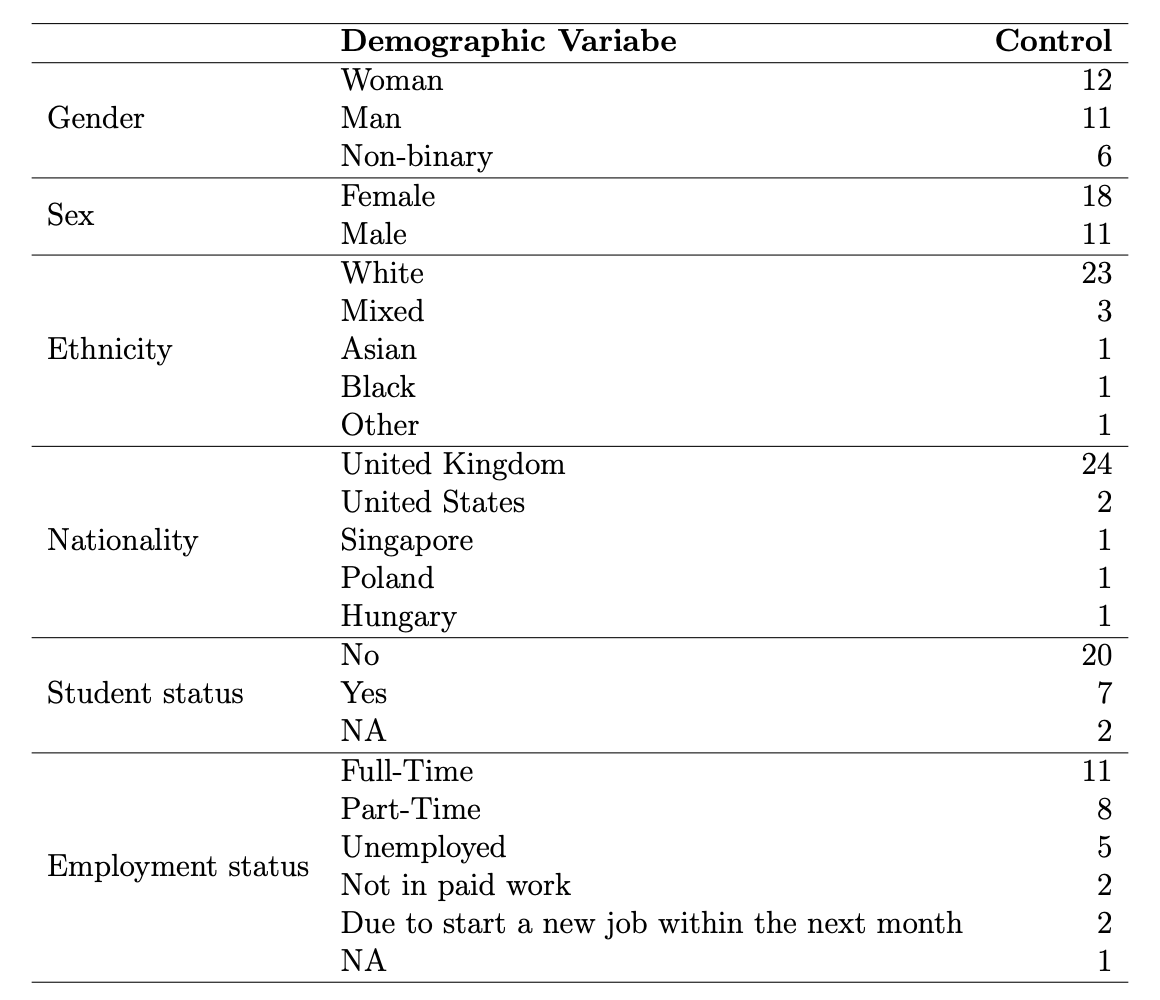

In [412]:
display.Image("Demographic_Info.png")

### What kinds of characters did they pick to play?

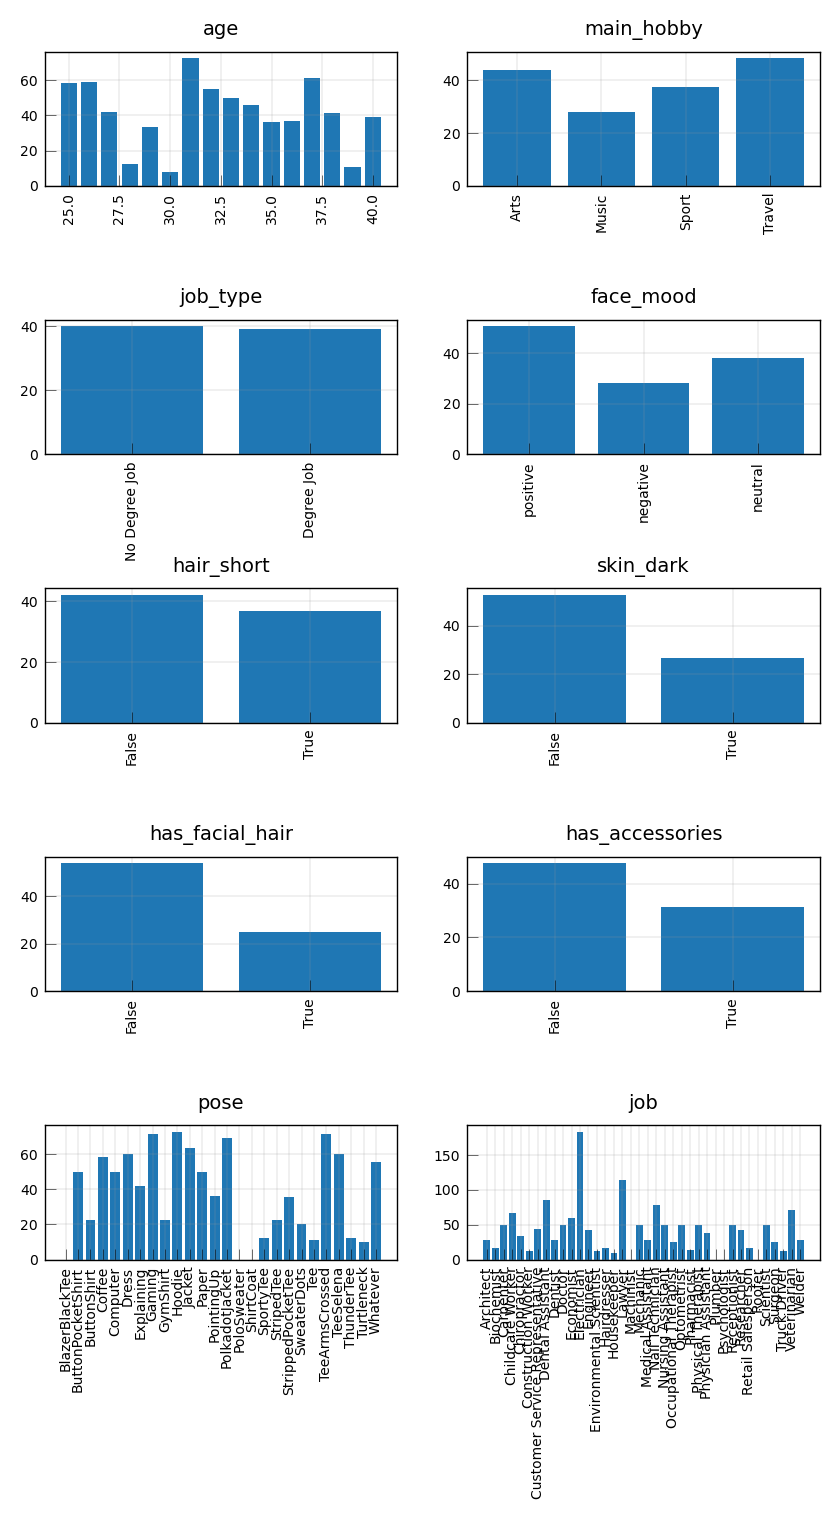

In [413]:
character_df['job_type'] = character_df['job_type'].replace({
    'No Higher Education Job': 'No Degree Job',
    'Higher Education Job': 'Degree Job'
})



merged_df = pd.merge(player_df, character_df, left_on='chosenProfile', right_on='profile_ID')

character_columns = ['age', 'main_hobby', 'job_type', 
                     'face_mood', 'hair_short', 'skin_dark', 
                     'has_facial_hair', 'has_accessories', 'pose', 'job']

rows = 5
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(5, 8), dpi=200)
axes = axes.flatten()

for i, column in enumerate(character_columns):
    total_value_counts = character_df[column].value_counts()
    picked_value_counts = merged_df[column].value_counts()
    normalized_counts = (picked_value_counts / total_value_counts).fillna(0) * 100  # Normalize to get percentages
    
    if column in ['hair_short', 'skin_dark', 'has_facial_hair', 'has_accessories']:
        normalized_counts.index = normalized_counts.index.map({False: 'False', True: 'True'})
    
    axes[i].bar(normalized_counts.index, normalized_counts.values)
    axes[i].set_title(f'{column}')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=90)

plt.subplots_adjust(hspace=1)
plt.show()


### What attributes influenced them to pick the character? In which attributes do they consider themselves to be similar to their character?

Survey Questions: 
- Check whether the character you chose is similar to you or not
- How much did each characteristic influence your decision to choose this character?

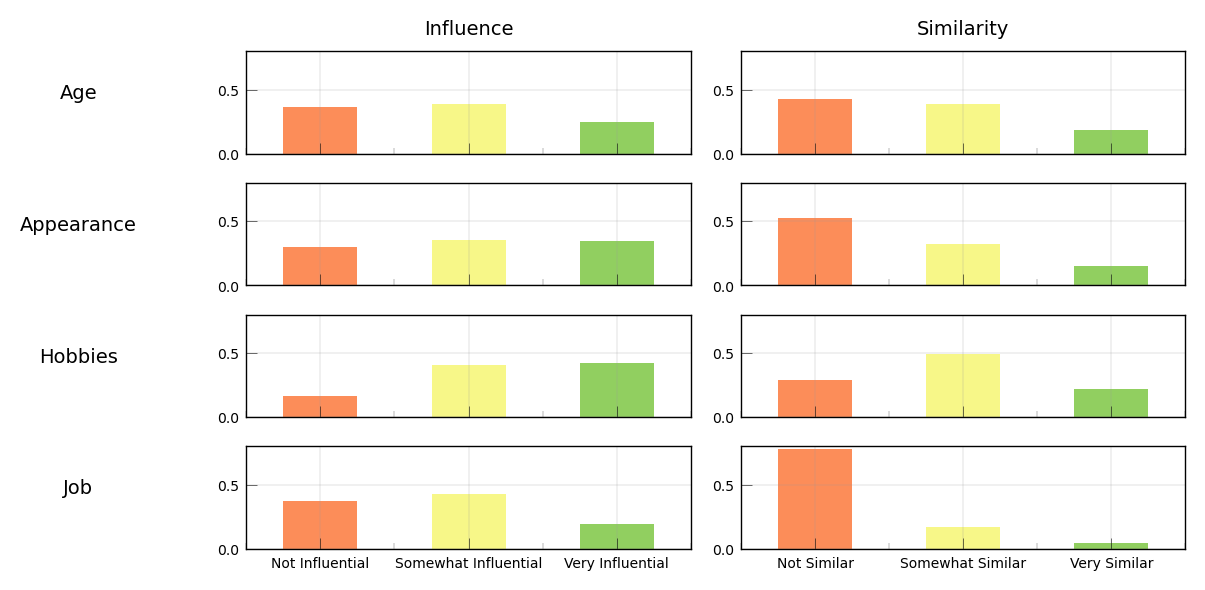

In [414]:
influence_columns = [col for col in characterChoiceSurvey_df.columns if 'Influence' in col]
similarity_columns = [col for col in characterChoiceSurvey_df.columns if 'Similarity' in col]
influence_categories = ['notInfluential', 'somewhatInfluential', 'veryInfluential']
similarity_categories = ['notSimilar', 'somewhatSimilar', 'verySimilar']

influence_counts = {col: characterChoiceSurvey_df[col].value_counts(normalize=True).reindex(influence_categories, fill_value=0) for col in influence_columns}
similarity_counts = {col: characterChoiceSurvey_df[col].value_counts(normalize=True).reindex(similarity_categories, fill_value=0) for col in similarity_columns}
fig, axs = plt.subplots(len(influence_columns), 2, figsize=(6, 3), sharex='col', dpi=200)

colors = ['#fc8d59', '#f7f788', '#91cf60']

for row, (col, counts) in enumerate(influence_counts.items()):
    counts.plot(kind='bar', ax=axs[row, 0], color=colors, legend=False)
    axs[row, 0].set_ylabel(col.replace('_', ' ').replace('Influence ', ''), rotation=0, labelpad=50)
    axs[row, 0].set_xlabel('')
    if row == len(influence_columns) - 1:  
        axs[row, 0].set_xticklabels(['Not Influential', 'Somewhat Influential', 'Very Influential'], rotation=0)
    axs[row, 0].set_ylim(0, 0.8)

for row, (col, counts) in enumerate(similarity_counts.items()):
    counts.plot(kind='bar', ax=axs[row, 1], color=colors, legend=False)
    axs[row, 1].set_ylabel('')
    axs[row, 1].set_xlabel('')
    if row == len(similarity_columns) - 1: 
        axs[row, 1].set_xticklabels(['Not Similar', 'Somewhat Similar', 'Very Similar'], rotation=0)
    axs[row, 1].set_ylim(0, 0.8)

axs[0, 0].set_title('Influence')
axs[0, 1].set_title('Similarity')

plt.tight_layout()
plt.subplots_adjust(left=0.2, top=0.9)
plt.show()


### Which types of characters did they like/dislike during swiping?

/Users/franziskahafner/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1204: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dtype))[~np.isnan(lk)].all():


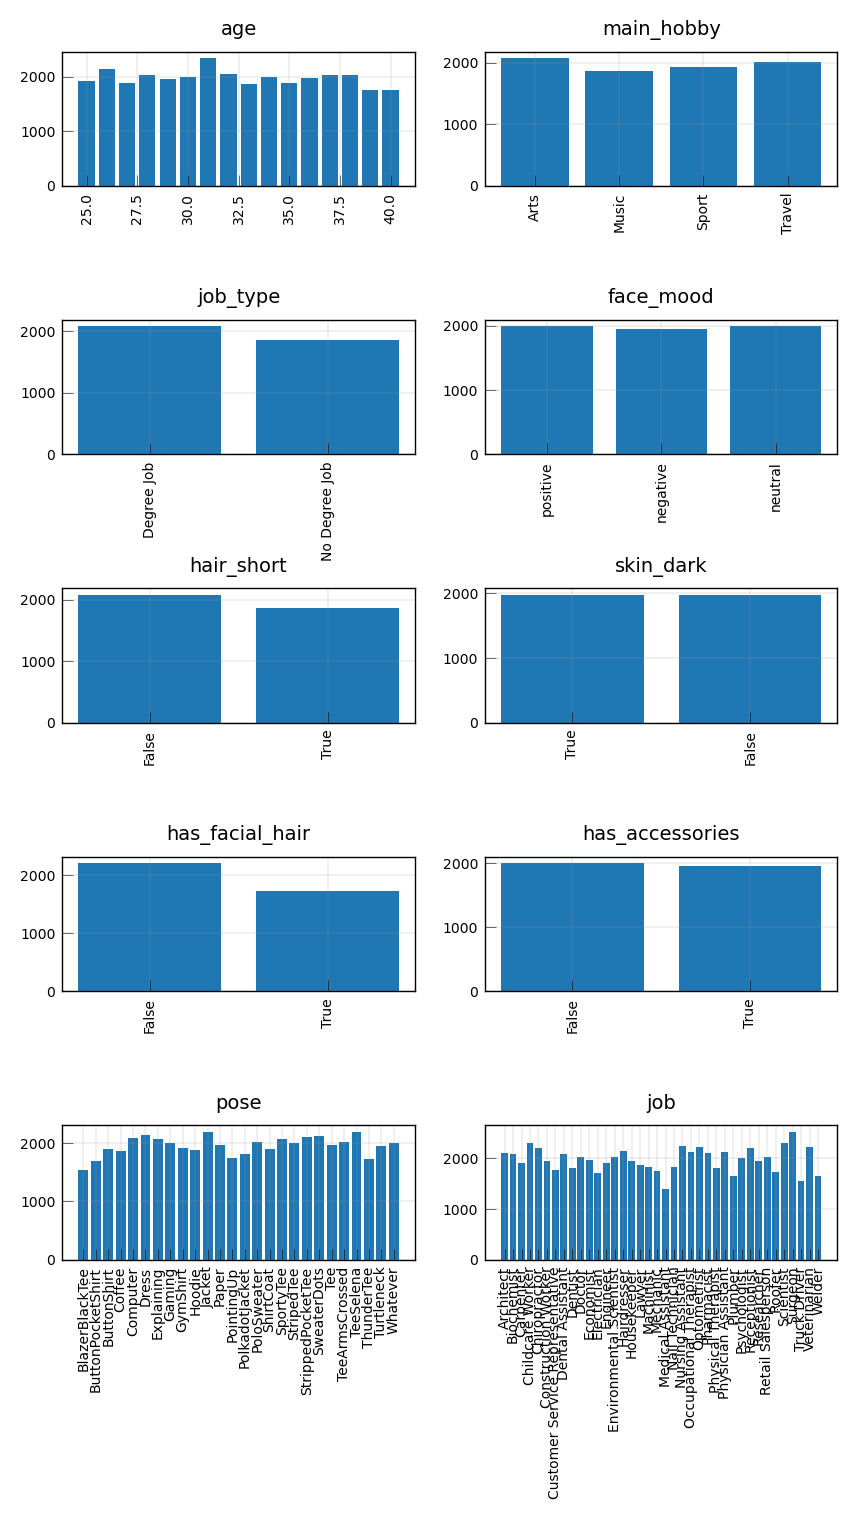

In [415]:
merged_df = pd.merge(SwipeDecision_df, character_df, left_on='likedProfile', right_on='profile_ID')
# merged_df['job_type'] = merged_df['job_type'].replace({
#     'No Higher Education Job': 'No Degree Job',
#     'Higher Education Job': 'Degree Job'
# })
character_columns = ['age', 'main_hobby', 'job_type', 
                     'face_mood', 'hair_short', 'skin_dark', 
                     'has_facial_hair', 'has_accessories', 'pose', 'job']

rows = 5
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(5, 8), dpi=200)
axes = axes.flatten()

for i, column in enumerate(character_columns):
    total_value_counts = character_df[column].value_counts()
    picked_value_counts = merged_df[column].value_counts()
    normalized_counts = (picked_value_counts / total_value_counts).fillna(0) * 100  # Normalize to get percentages
    
    if column in ['hair_short', 'skin_dark', 'has_facial_hair', 'has_accessories']:
        normalized_counts.index = normalized_counts.index.map({False: 'False', True: 'True'})
    
    axes[i].bar(normalized_counts.index, normalized_counts.values)
    axes[i].set_title(f'{column}')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=90)

plt.subplots_adjust(hspace=1)
plt.show()

### Which attributes did they say made them pick one character over another during swiping?

Survey Question"
 - For each of the following profile characteristics, indicate whether the chosen character was better, both were about the same, or the other character was better.

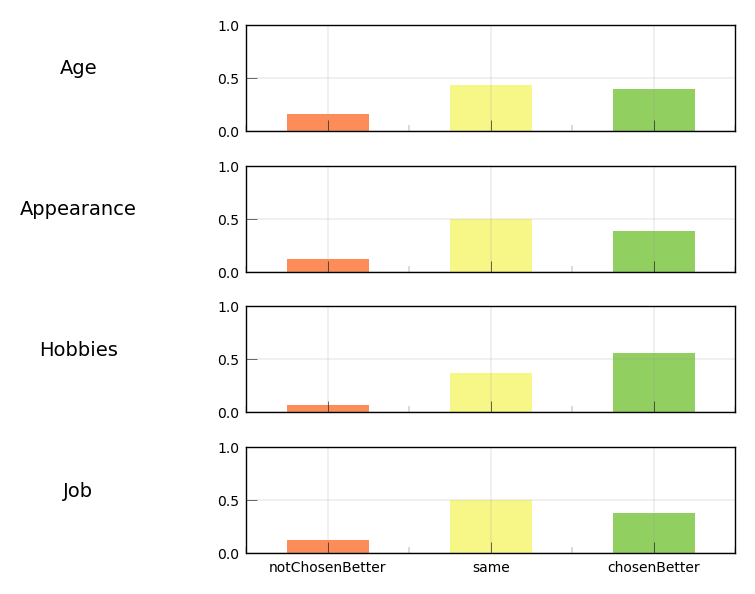

In [416]:
attribute_columns = ['AttributeAge', 'AttributeAppearance', 'AttributeHobbies', 'AttributeJob']
attribute_categories = ['notChosenBetter', 'same', 'chosenBetter']

filtered_df = SwipeProfileProfileChoiceSurvey_df[SwipeProfileProfileChoiceSurvey_df['attentionCheck'] != 'attentionAgeIsSame']

attribute_counts = {
    col: filtered_df[col].value_counts(normalize=True).reindex(attribute_categories, fill_value=0) 
    if col == 'AttributeAge' else 
    SwipeProfileProfileChoiceSurvey_df[col].value_counts(normalize=True).reindex(attribute_categories, fill_value=0)
    for col in attribute_columns
}

fig, axs = plt.subplots(len(attribute_columns), 1, figsize=(3, 3), sharex=True, dpi=200)

colors = ['#fc8d59', '#f7f788', '#91cf60']

for row, (col, counts) in enumerate(attribute_counts.items()):
    counts.plot(kind='bar', ax=axs[row], color=colors, legend=False)
    axs[row].set_ylabel(col.replace('Attribute', ''), rotation=0, labelpad=50)
    axs[row].set_xlabel('')
    if row == len(attribute_columns) - 1:
        axs[row].set_xticklabels(attribute_categories, rotation=0)
    axs[row].set_ylim(0, 1)

axs[0].set_title('')
plt.tight_layout()
plt.subplots_adjust(left=0.15, top=0.95)
plt.show()

### How did the perceived difficulty of their choice change during the experiment?

Survey Question:
 - How well do the recommended characters fit with your character?

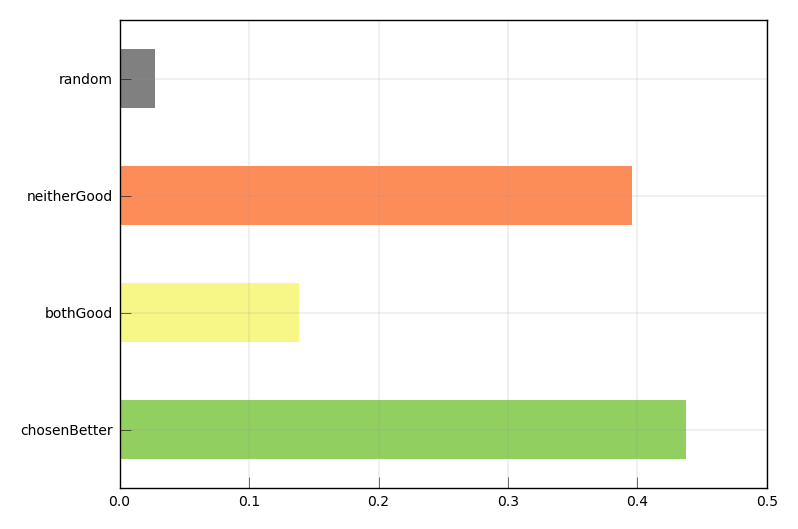

In [417]:
choice_column = 'AttributeDifficulty'
choice_categories = [
    'chosenBetter', 
    'bothGood',
    'neitherGood', 
    'random'
]

choice_counts = SwipeProfileProfileChoiceSurvey_df[choice_column].value_counts(normalize=True).reindex(choice_categories, fill_value=0)
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=20)) for label in choice_categories]
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
colors = ['#91cf60','#f7f788', '#fc8d59', 'grey']
choice_counts.plot(kind='barh', ax=ax, color=colors, legend=False)
ax.set_xlabel('')
ax.set_yticklabels(wrapped_labels, rotation=0)
ax.set_xlim(0, 0.5)
ax.set_title('')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

### How did they perceive the recommendations to improve during the experiment? 

Survey Question:
- Do you feel that the recommendation system has learned and improved its suggestions since you began interacting with it?

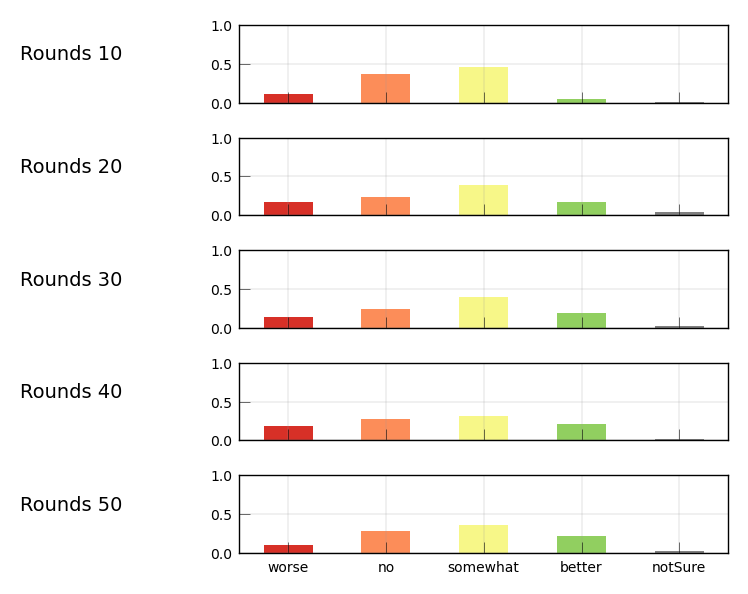

In [418]:
rounds_played_categories = [10, 20, 30, 40, 50]
improvement_categories = ['worse', 'no', 'somewhat', 'better', 'notSure']

improvement_counts = {
    rounds: SwipeProfileRecSystemSurvey_df[SwipeProfileRecSystemSurvey_df['roundsPlayed'] == rounds]['Improvement'].value_counts(normalize=True).reindex(improvement_categories, fill_value=0)
    for rounds in rounds_played_categories
}

fig, axs = plt.subplots(len(rounds_played_categories), 1, figsize=(3, 3), sharex=True, dpi=200)

colors = ['#d73027', '#fc8d59', '#f7f788', '#91cf60', 'grey']

for row, (rounds, counts) in enumerate(improvement_counts.items()):
    counts.plot(kind='bar', ax=axs[row], color=colors, legend=False)
    axs[row].set_ylabel(f'Rounds {rounds}', rotation=0, labelpad=50)
    axs[row].set_xlabel('')
    if row == len(rounds_played_categories) - 1:
        axs[row].set_xticklabels(improvement_categories, rotation=0)
    axs[row].set_ylim(0, 1)

axs[0].set_title('')

plt.tight_layout()
plt.subplots_adjust(left=0.15, top=0.95)
plt.show()


### How did they perceive the recommendation variety to change during the experiment? 

Survey Question:
- How would you describe the variety of user profiles you get recommended?

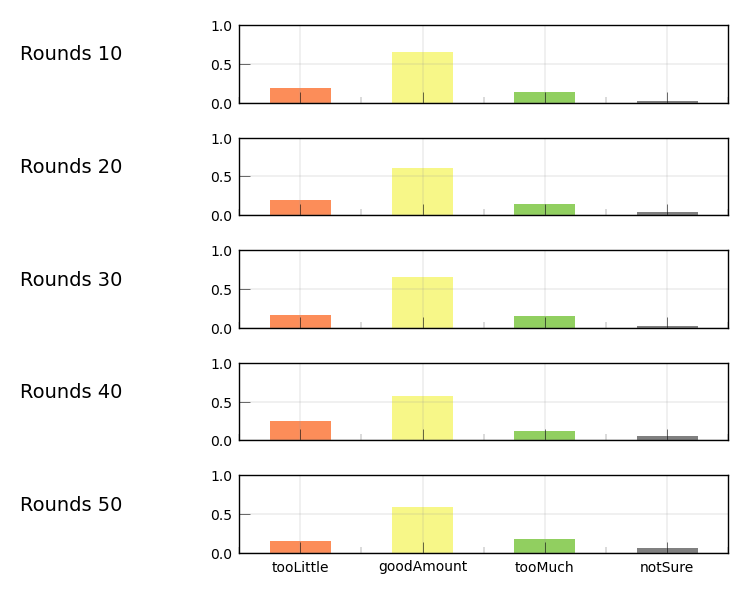

In [419]:
rounds_played_categories = [10, 20, 30, 40, 50]
variety_categories = ['tooLittle', 'goodAmount', 'tooMuch', 'notSure']

variety_counts = {
    rounds: SwipeProfileRecSystemSurvey_df[SwipeProfileRecSystemSurvey_df['roundsPlayed'] == rounds]['Variety'].value_counts(normalize=True).reindex(variety_categories, fill_value=0)
    for rounds in rounds_played_categories
}

fig, axs = plt.subplots(len(rounds_played_categories), 1, figsize=(3, 3), sharex=True, dpi=200)

colors = ['#fc8d59', '#f7f788', '#91cf60', 'grey']

for row, (rounds, counts) in enumerate(variety_counts.items()):
    counts.plot(kind='bar', ax=axs[row], color=colors, legend=False)
    axs[row].set_ylabel(f'Rounds {rounds}', rotation=0, labelpad=50)
    axs[row].set_xlabel('')
    if row == len(rounds_played_categories) - 1:  # Only set x-tick labels on the bottom subplot
        axs[row].set_xticklabels(variety_categories, rotation=0)
    axs[row].set_ylim(0, 1)

axs[0].set_title('')

plt.tight_layout()
plt.subplots_adjust(left=0.15, top=0.95)
plt.show()



### Which attributes do they think the algorithm learnt?

Survey Question:
- To what extent do you think the algorithm learned about your character’s preferences regarding the following attributes? Rank each:

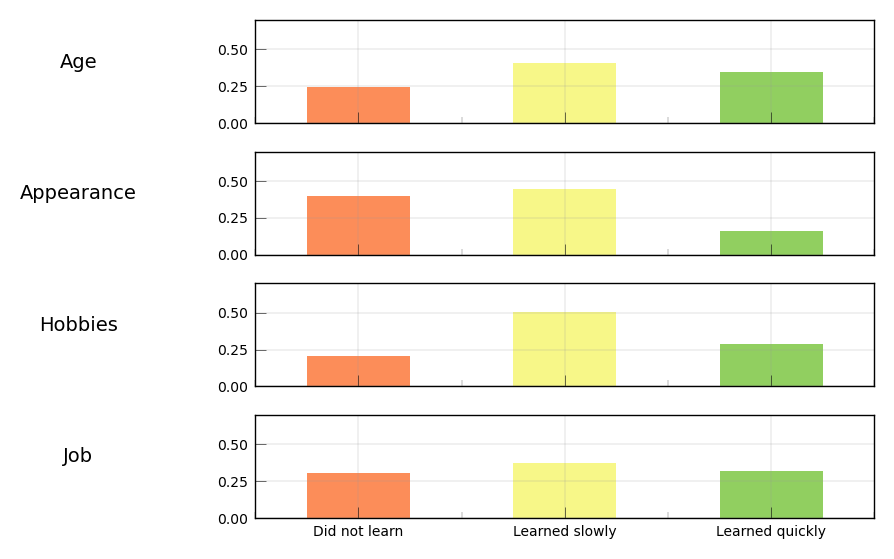

In [420]:
attribute_columns = [col for col in endRecSystemSurvey_df.columns if 'algorithmLearntAttribute' in col]
attribute_categories = ['Did not learn', 'Learned slowly', 'Learned quickly']

attribute_counts = {col: endRecSystemSurvey_df[col].value_counts(normalize=True).reindex(attribute_categories, fill_value=0) for col in attribute_columns}

fig, axs = plt.subplots(len(attribute_columns), 1, figsize=(4, 3), sharex=True, dpi=200)
colors = ['#fc8d59', '#f7f788', '#91cf60']
for row, (col, counts) in enumerate(attribute_counts.items()):
    counts.plot(kind='bar', ax=axs[row], color=colors, legend=False)
    axs[row].set_ylabel(col.replace('algorithmLearntAttribute-', ''), rotation=0, labelpad=50)
    axs[row].set_xlabel('')
    axs[row].set_xticklabels(attribute_categories, rotation=0)
    axs[row].set_ylim(0, 0.7)

fig.suptitle('')

plt.tight_layout()
plt.subplots_adjust(left=0.2, top=0.9)
plt.show()

### How did they perceive algorithm diversity?

Survey Question:
- Regarding the diversity of recommendations, do you think:

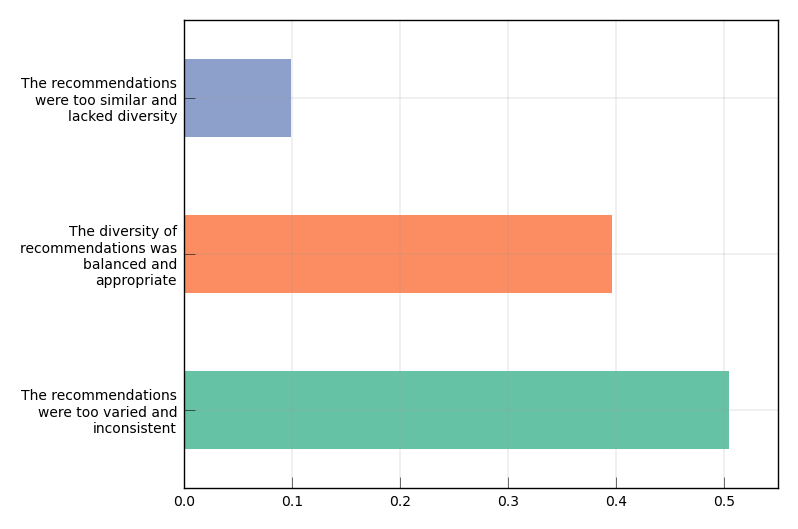

In [423]:
choice_column = 'recommendationDiversity'
choice_categories = [
    'The recommendations were too varied and inconsistent', 
    'The diversity of recommendations was balanced and appropriate', 
    'The recommendations were too similar and lacked diversity'
]
choice_counts = endRecSystemSurvey_df[choice_column].value_counts(normalize=True).reindex(choice_categories, fill_value=0)
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=20)) for label in choice_categories]
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
choice_counts.plot(kind='barh', ax=ax, color=colors, legend=False)
ax.set_xlabel('')
ax.set_yticklabels(wrapped_labels, rotation=0)
ax.set_xlim(0, 0.55)
ax.set_title('')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

### How did they perceive algorithm quality?

Survey Question:
- Regarding the quality of recommendations, do you think:

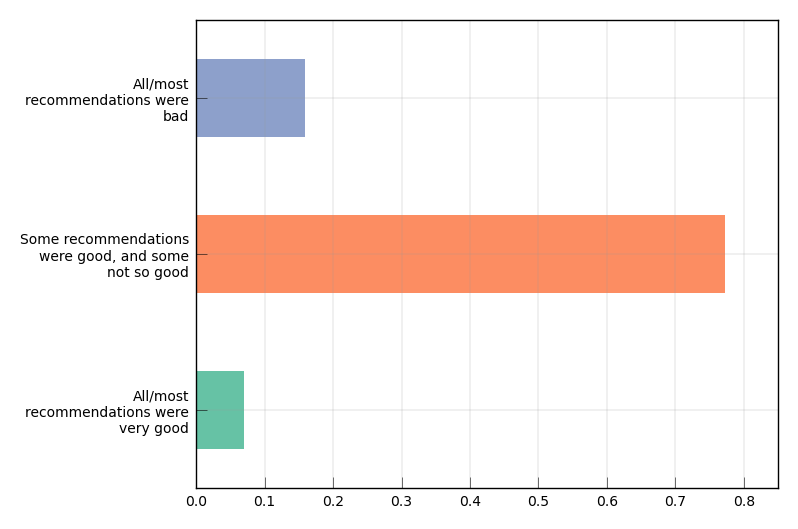

In [424]:
choice_column = 'recommendationQuality'
choice_categories = ["All/most recommendations were very good", 
                     "Some recommendations were good, and some not so good", 
                     "All/most recommendations were bad"]
choice_counts = endRecSystemSurvey_df[choice_column].value_counts(normalize=True).reindex(choice_categories, fill_value=0)
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=20)) for label in choice_categories]
fig, ax = plt.subplots(figsize=(4,3), dpi=200)
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
choice_counts.plot(kind='barh', ax=ax, color=colors, legend=False)
ax.set_xlabel('')
ax.set_yticklabels(wrapped_labels, rotation=0)
ax.set_xlim(0, 0.85)
ax.set_title('')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

### Which type of algorithm do they think they got?

Survey Question:
- Which of the following algorithms do you think was used to recommend profiles to you during the previous experiment?

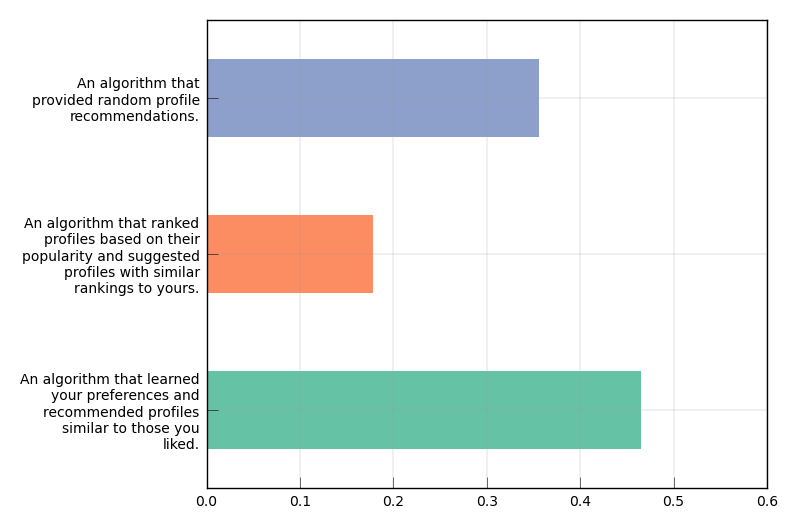

In [425]:
choice_column = 'algorithmChoice'
choice_categories = ["An algorithm that learned your preferences and recommended profiles similar to those you liked.",
                          "An algorithm that ranked profiles based on their popularity and suggested profiles with similar rankings to yours.",
                          "An algorithm that provided random profile recommendations."]
choice_counts = endRecSystemSurvey_df[choice_column].value_counts(normalize=True).reindex(choice_categories, fill_value=0)
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=25)) for label in choice_categories]
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
choice_counts.plot(kind='barh', ax=ax, color=colors, legend=False)
ax.set_xlabel('')
ax.set_yticklabels(wrapped_labels, rotation=0)
ax.set_xlim(0, 0.6)
ax.set_title('')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

### What types of factors do they consider when dating? What factors do they think an algorithm should be allowed to consider?

Survey Questions:
- What factors would you consider when determining if someone is a good match on a dating app? Rank each:
- Dating apps use various aspects of user profiles to make recommendations. From an ethical standpoint, which of the following factors do you believe should be permissible for them to consider? Rank each:

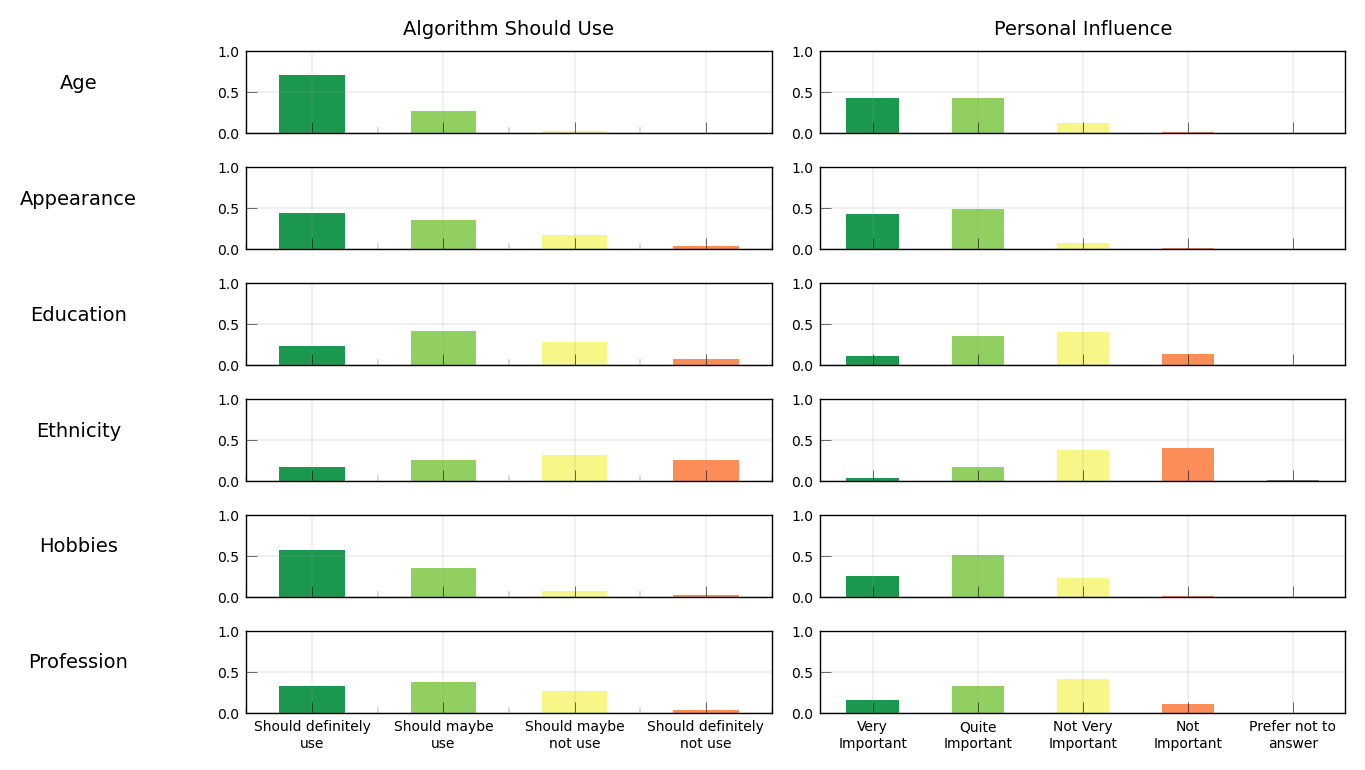

In [426]:
algorithm_columns = [col for col in endDatingAppSurvey_df.columns if 'AlgorithmShouldUse' in col]
influence_columns = [col for col in endDatingAppSurvey_df.columns if 'PersonalInfluence' in col]

algorithm_categories = ['Should definitely use', 'Should maybe use', 'Should maybe not use', 'Should definitely not use']
influence_categories = ['Very Important', 'Quite Important', 'Not Very Important', 'Not Important', 'Prefer not to answer']

algorithm_counts = {col: endDatingAppSurvey_df[col].value_counts(normalize=True).reindex(algorithm_categories, fill_value=0) for col in algorithm_columns}
influence_counts = {col: endDatingAppSurvey_df[col].value_counts(normalize=True).reindex(influence_categories, fill_value=0) for col in influence_columns}

colors_algorithm = ['#1a9850', '#91cf60', '#f7f788', '#fc8d59']
colors_influence = ['#1a9850', '#91cf60', '#f7f788', '#fc8d59', 'gray']

def split_labels(labels):
    split_points = {
        'Should definitely use': 'Should definitely\nuse',
        'Should maybe use': 'Should maybe\nuse',
        'Should maybe not use': 'Should maybe\nnot use',
        'Should definitely not use': 'Should definitely\nnot use',
        'Very Important': 'Very\nImportant',
        'Quite Important': 'Quite\nImportant',
        'Not Very Important': 'Not Very\nImportant',
        'Not Important': 'Not\nImportant',
        'Prefer not to answer': 'Prefer not to\nanswer'
    }
    return [split_points[label] for label in labels]
fig, axs = plt.subplots(len(algorithm_columns), 2, figsize=(7, 4), sharex='col', dpi=200)

for row, (col, counts) in enumerate(algorithm_counts.items()):
    counts.plot(kind='bar', ax=axs[row, 0], color=colors_algorithm, legend=False)
    axs[row, 0].set_ylabel(col.replace('AlgorithmShouldUse-', ''), rotation=0, labelpad=50)
    axs[row, 0].set_xlabel('')
    if row == len(algorithm_columns) - 1:
        axs[row, 0].set_xticklabels(split_labels(algorithm_categories), rotation=0)
    axs[row, 0].set_ylim(0, 1)

for row, (col, counts) in enumerate(influence_counts.items()):
    counts.plot(kind='bar', ax=axs[row, 1], color=colors_influence, legend=False)
    axs[row, 1].set_xlabel('')
    if row == len(influence_columns) - 1:
        axs[row, 1].set_xticklabels(split_labels(influence_categories), rotation=0)
    axs[row, 1].set_ylim(0, 1)

axs[0, 0].set_title('Algorithm Should Use')
axs[0, 1].set_title('Personal Influence')

plt.tight_layout()
plt.subplots_adjust(left=0.2, top=0.9)
plt.show()

### What dating apps have they used before?

Survey Question:
- Which dating apps have you used before? (Check all that apply)

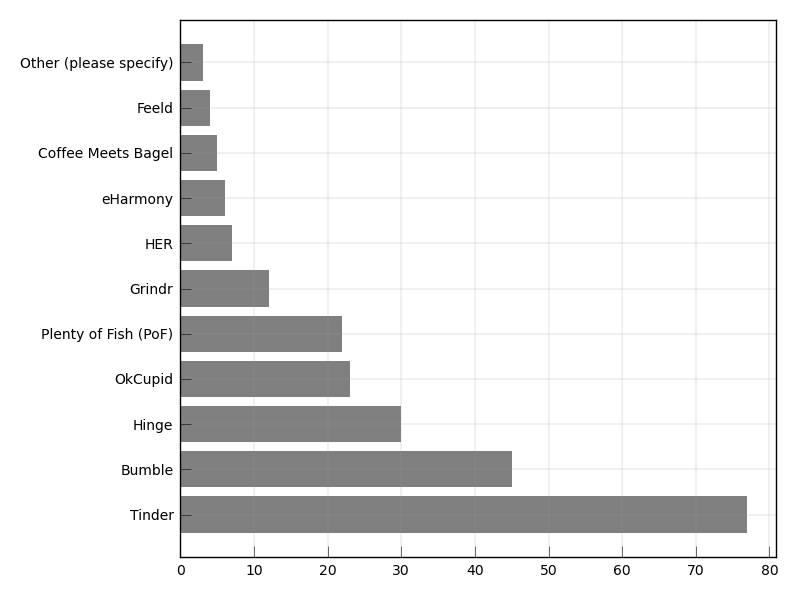

In [427]:
app_counts = {}
for apps in endDatingAppSurvey_df['datingAppsUsed']:
    app_list = ast.literal_eval(apps)
    for app in app_list:
        if app in app_counts:
            app_counts[app] += 1
        else:
            app_counts[app] = 1

app_counts_df = pd.DataFrame(list(app_counts.items()), columns=['App', 'Count'])

app_counts_df = app_counts_df.sort_values(by='Count', ascending=False)
plt.figure(figsize=(4, 3), dpi=200)
plt.barh(app_counts_df['App'], app_counts_df['Count'], color='grey')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.tight_layout()
plt.show()

In [428]:
endDatingAppSurvey_df

,id,AlgorithmShouldUse-Age,AlgorithmShouldUse-Appearance,AlgorithmShouldUse-Education,AlgorithmShouldUse-Ethnicity,AlgorithmShouldUse-Hobbies,AlgorithmShouldUse-Profession,PersonalInfluence-Age,PersonalInfluence-Appearance,PersonalInfluence-Education,PersonalInfluence-Ethnicity,PersonalInfluence-Hobbies,PersonalInfluence-Profession,activeOnDatingApps,datingAppsUsed,batchID,gameID,playerID,roundID
0,01J1TTZ5DCHFKHTNF8X0J1S5T3,Should definitely use,Should definitely use,Should maybe not use,Should definitely use,Should maybe not use,Should maybe use,Very Important,Very Important,Very Important,Not Important,Not Very Important,Quite Important,I am not currently active on dating apps but w...,"[""Tinder""]",01J1TPRQR0AQARK30XQ4RJQ9N2,01J1TPRQV5NQ4RBH74KEMRXJWJ,01J1TSJPARN3CB8YRHEWD4PPG9,01J1TSM04ZWAZ1A497KRAQ7DMQ
1,01J1TRMBET3DEA0RA0VXXDVRZB,Should definitely use,Should maybe not use,Should maybe use,Should maybe not use,Should definitely use,Should maybe not use,Quite Important,Quite Important,Not Very Important,Not Important,Quite Important,Not Very Important,I am not currently active on dating apps but w...,"[""Tinder"",""Bumble"",""Hinge""]",01J1TPRQR0AQARK30XQ4RJQ9N2,01J1TPRQT1DE4JGM3EXVYNTE6T,01J1TQYM9CW5N1SZKRHQ6QXMB3,01J1TQYPV2PWKVYDXZYVQRVV0R
2,01J1TT14HFXT26FZS55DGQMWNH,Should definitely use,Should maybe use,Should maybe use,Should maybe not use,Should definitely use,Should maybe use,Quite Important,Not Very Important,Quite Important,Not Important,Quite Important,Not Very Important,I am not currently active on dating apps but w...,"[""Bumble"",""Tinder"",""Hinge""]",01J1TPRQR0AQARK30XQ4RJQ9N2,01J1TPRQT4AFY9Y2QS6V17HQ2C,01J1TSBC1JBYGJ3PRK05CRMF3K,01J1TSGNA049MBP3NP12GFK7JN
3,01J1TRDBD68FDY560SKN6KYWQR,Should maybe use,Should maybe use,Should maybe use,Should maybe use,Should maybe use,Should maybe use,Quite Important,Quite Important,Quite Important,Not Very Important,Very Important,Quite Important,I am not currently active on dating apps but w...,"[""Tinder"",""Bumble"",""Hinge"",""Coffee Meets Bagel...",01J1TPRQR0AQARK30XQ4RJQ9N2,01J1TPRQTDR101X78RW058CF7R,01J1TQNANBFZV7M6VRM670890H,01J1TQNP7ZJ0NH891MZFFXHJHD
4,01J1TT9HTEJXTRJJ3Y41R8BDVD,Should definitely use,Should maybe use,Should maybe not use,Should maybe use,Should definitely use,Should maybe not use,Very Important,Very Important,Not Very Important,Quite Important,Quite Important,Not Very Important,I am not currently active on dating apps but w...,"[""Tinder"",""Bumble""]",01J1TPRQR0AQARK30XQ4RJQ9N2,01J1TPRQT66B9ZKV86D9T68KGY,01J1TSQAXER19SYB115VJTTA76,01J1TSQS4R1WF9VBJ086PV82BF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,01J1R5ZTFCDDK10C39F1TMWD7N,Should definitely use,Should maybe use,Should maybe not use,Should definitely not use,Should definitely use,Should maybe use,Quite Important,Very Important,Not Very Important,Not Very Important,Quite Important,Not Very Important,I am not currently active on dating apps but w...,"[""Tinder"",""Bumble""]",01J1R2GFZA9PWFJ7ZYRQXM0AHA,01J1R2GG3ABBQ1KGPR23VNQP0T,01J1R5CZ1YZT9P0XTG2GEHM8CN,01J1R5D5XM718SWPV9J2109C5X
97,01J1R7KRT6TJ6H2AAYP7D2K26Y,Should definitely use,Should definitely use,Should maybe use,Should definitely not use,Should maybe use,Should maybe use,Quite Important,Very Important,Quite Important,Not Very Important,Not Very Important,Not Very Important,I am currently active on dating apps.,"[""Tinder"",""Bumble"",""Plenty of Fish (PoF)""]",01J1R2GFZA9PWFJ7ZYRQXM0AHA,01J1R2GG1XCW2RQDPTEFHP27JC,01J1R6VPC3EWGGJV8ZF94GJG68,01J1R6VTKHSGCJ420GS682YCRB
98,01J1R6BWT7H7Z9ZY4DXW61WX2T,Should definitely use,Should maybe not use,Should maybe not use,Should maybe not use,Should definitely use,Should definitely use,Quite Important,Very Important,Not Important,Not Very Important,Quite Important,Not Important,I am not currently active on dating apps but w...,"[""Tinder"",""Bumble""]",01J1R2GFZA9PWFJ7ZYRQXM0AHA,01J1R2GG21AA5XKZZ0RRTMDQ37,01J1R4VK1EK81CRJQRRRETRX9B,01J1R4W75C84N530APDK7WFF0X
99